In [15]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
%pdb off

from pyCascade import probePost, physics, quantities
from matplotlib import pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit
from scipy.signal import welch
import pandas as pd
import statsmodels.api as sm

category =  "config2"
run = 52



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Automatic pdb calling has been turned OFF


In [16]:
############ Universal ################
scratch_home = os.getenv('SCRATCH') #need to set SCRATCH (even if there is no real SCRATCH) to the location where results are written
scratch_dir = f'{scratch_home}/Cascade/city_block_cfd'
home_dir = !pwd
home_dir = home_dir[0]

display(scratch_dir)
display(home_dir)

'/scratch/users/nbachand/Cascade/city_block_cfd'

'/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd'

In [17]:
run_dir = f'{home_dir}/CHARLES/{category}/R{run}/'

In [18]:
!cat {run_dir}/slurm-*.out | grep ">> S is" > {run_dir}/mom_source_S.ssv
!cat {run_dir}/slurm-*.out | grep ">> u_t" > {run_dir}/mom_source_u.ssv
!cat {run_dir}/slurm-*.out | grep ">> w_t" > {run_dir}/mom_source_w.ssv

S = pd.read_csv(f"{run_dir}/mom_source_S.ssv", delimiter=' ', header = None)
u = pd.read_csv(f"{run_dir}/mom_source_u.ssv", delimiter=' ', header = None)
w = pd.read_csv(f"{run_dir}/mom_source_w.ssv", delimiter=' ', header = None)

S = S[3]
u = u[3]
w = w[3]

N = len(S)

N = len(S)

f = .02 * 100
t = pd.Series(np.arange(0, N*f, f), index = S.index)

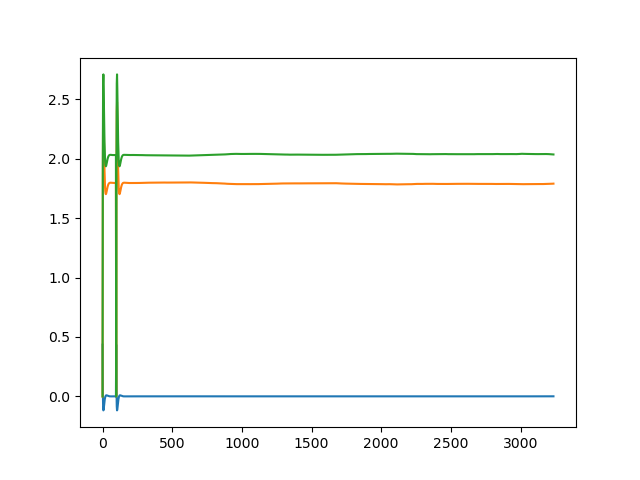

In [19]:
plt.figure()
plt.plot(t, S)
plt.plot(t, u)
plt.plot(t, w)

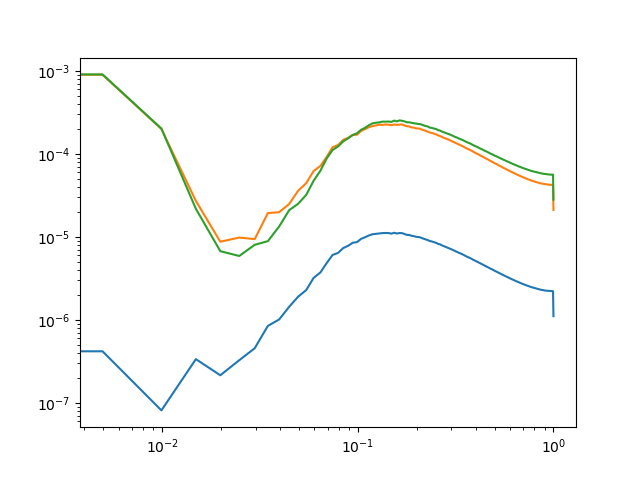

In [22]:
plt.figure()
f_array, E_S = welch(S - np.mean(S), fs = f, axis = 0, nperseg = N//4, scaling = 'density', detrend = 'constant') 
f_array, E_u = welch(u - np.mean(u), fs = f, axis = 0, nperseg = N//4, scaling = 'density', detrend = 'constant') 
f_array, E_w = welch(w - np.mean(w), fs = f, axis = 0, nperseg = N//4, scaling = 'density', detrend = 'constant') 
plt.loglog(f_array, E_S)
plt.loglog(f_array, E_u)
plt.loglog(f_array, E_w)

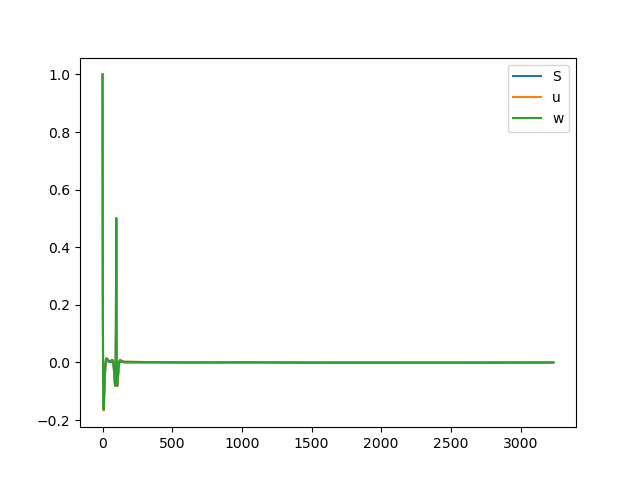

In [21]:
plt.figure()
R_S = sm.tsa.stattools.acf(S - np.mean(S), nlags = len(t)-1, fft = True) # compute autocorrelation function
R_u = sm.tsa.stattools.acf(u - np.mean(u), nlags = len(t)-1, fft = True) # compute autocorrelation function
R_w = sm.tsa.stattools.acf(w - np.mean(w), nlags = len(t)-1, fft = True) # compute autocorrelation function

plt.plot(t, R_S, label = 'S')
plt.plot(t, R_u, label = 'u')
plt.plot(t, R_w, label = 'w')
plt.legend()